In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [50]:
df = pd.read_csv('transactions.csv')
df.head()

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


In [51]:
df.describe()

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,promo_used,avs_match,cvv_result,three_ds_flag,shipping_distance_km,is_fraud
count,299695.0000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000
mean,149848.0000,3002.559432,973.397871,50.673321,148.142973,177.165279,0.153640,0.837999,0.872110,0.784588,357.049028,0.022062
std,86514.6388,1732.309663,525.241409,5.976391,200.364624,306.926507,0.360603,0.368453,0.333968,0.411109,427.672074,0.146887
min,1.0000,1.000000,1.000000,40.000000,3.520000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74924.5000,1501.000000,516.000000,46.000000,46.190000,42.100000,0.000000,1.000000,1.000000,1.000000,136.600000,0.000000
50%,149848.0000,3007.000000,975.000000,51.000000,90.130000,89.990000,0.000000,1.000000,1.000000,1.000000,273.020000,0.000000
75%,224771.5000,4504.000000,1425.000000,56.000000,173.450000,191.110000,0.000000,1.000000,1.000000,1.000000,409.180000,0.000000
max,299695.0000,6000.000000,1890.000000,60.000000,4565.290000,16994.740000,1.000000,1.000000,1.000000,1.000000,3748.560000,1.000000


###### Megecek missing values

In [52]:
df.isnull().sum()

transaction_id             0
user_id                    0
account_age_days           0
total_transactions_user    0
avg_amount_user            0
amount                     0
country                    0
bin_country                0
channel                    0
merchant_category          0
promo_used                 0
avs_match                  0
cvv_result                 0
three_ds_flag              0
transaction_time           0
shipping_distance_km       0
is_fraud                   0
dtype: int64

###### Melihat variasi kelas pada kolom

In [53]:
df.nunique()

transaction_id             299695
user_id                      6000
account_age_days             1801
total_transactions_user        21
avg_amount_user              5347
amount                      60043
country                        10
bin_country                    10
channel                         2
merchant_category               5
promo_used                      2
avs_match                       2
cvv_result                      2
three_ds_flag                   2
transaction_time           297975
shipping_distance_km        73447
is_fraud                        2
dtype: int64

###### Membuang fitur yang kurang berguna

In [54]:
df = df.drop(['transaction_id', 'user_id'], axis=1)
df.head()

,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


###### medefinisikan variable columns dari data

In [55]:
numeric_cols = ['account_age_days','total_transactions_user','avg_amount_user','amount','shipping_distance_km']

In [56]:
fraud = df[df['is_fraud'] == 1]
non_fraud = df[df['is_fraud'] == 0]

###### hasil grafik numeric

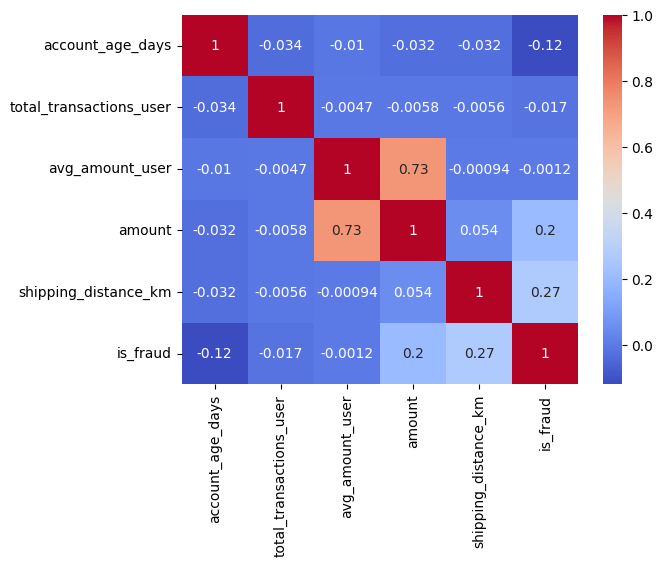

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[numeric_cols + ['is_fraud']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


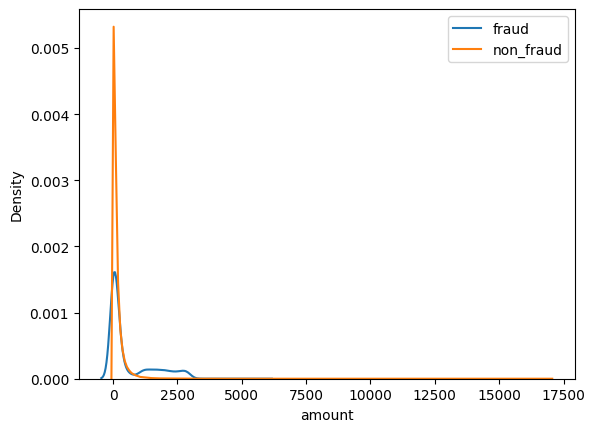

In [58]:
sns.kdeplot(fraud['amount'], label='fraud')
sns.kdeplot(non_fraud['amount'], label='non_fraud')
plt.legend()
plt.show()

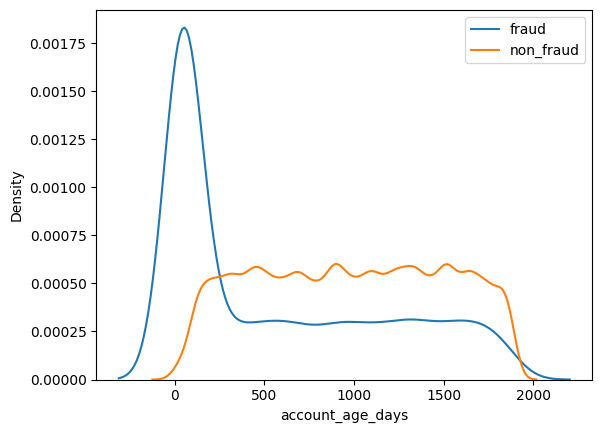

In [59]:
sns.kdeplot(fraud['account_age_days'], label='fraud')
sns.kdeplot(non_fraud['account_age_days'], label='non_fraud')
plt.legend()
plt.show()

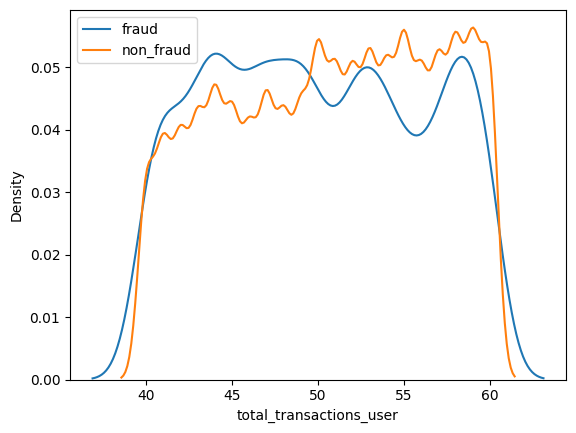

In [60]:
sns.kdeplot(fraud['total_transactions_user'], label='fraud')
sns.kdeplot(non_fraud['total_transactions_user'], label='non_fraud')
plt.legend()
plt.show()

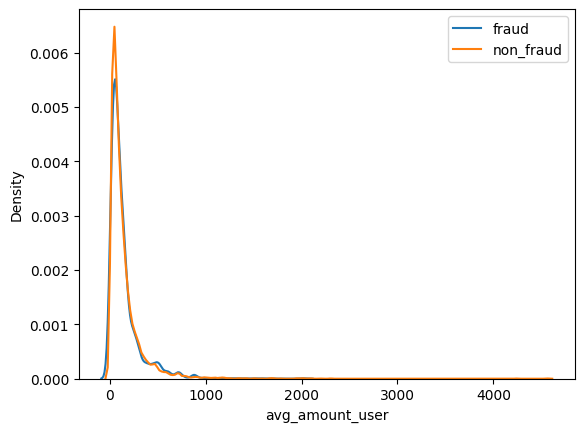

In [61]:
sns.kdeplot(fraud['avg_amount_user'], label='fraud')
sns.kdeplot(non_fraud['avg_amount_user'], label='non_fraud')
plt.legend()
plt.show()

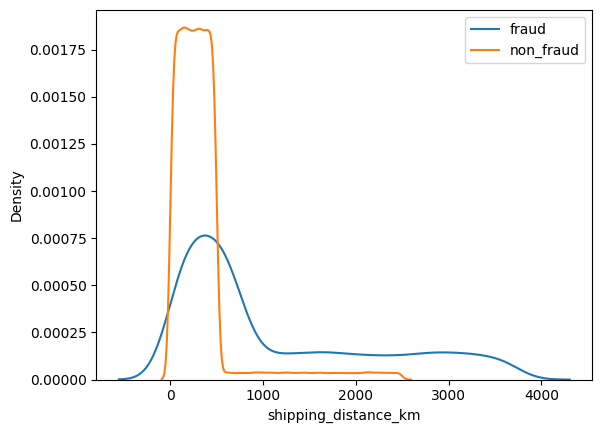

In [62]:
sns.kdeplot(fraud['shipping_distance_km'], label='fraud')
sns.kdeplot(non_fraud['shipping_distance_km'], label='non_fraud')
plt.legend()
plt.show()

###### Hasil grafil categorical

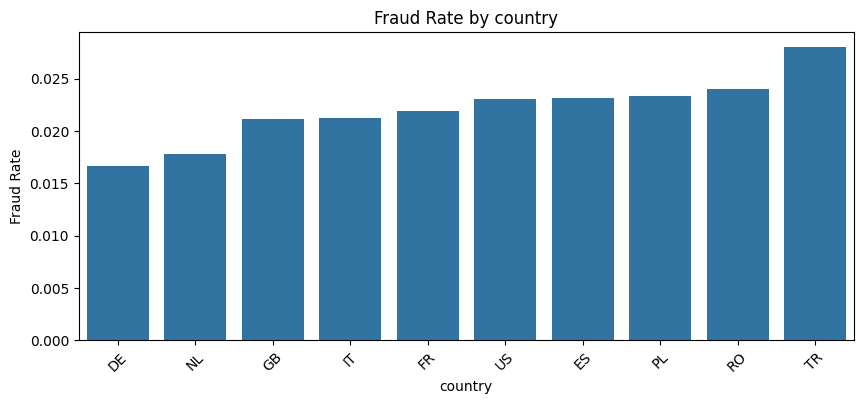

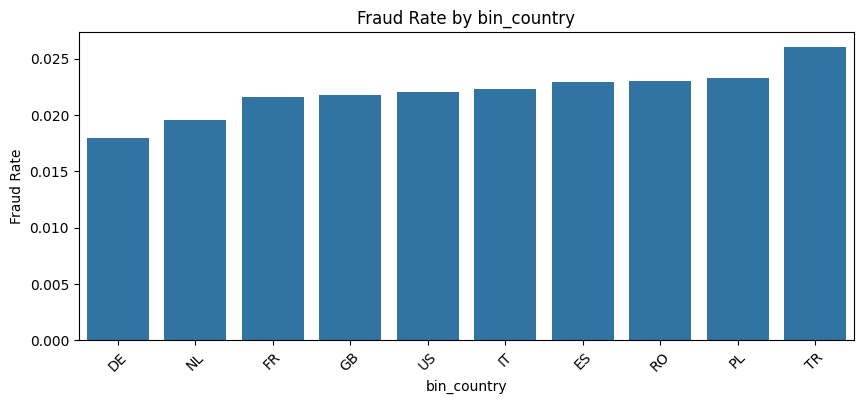

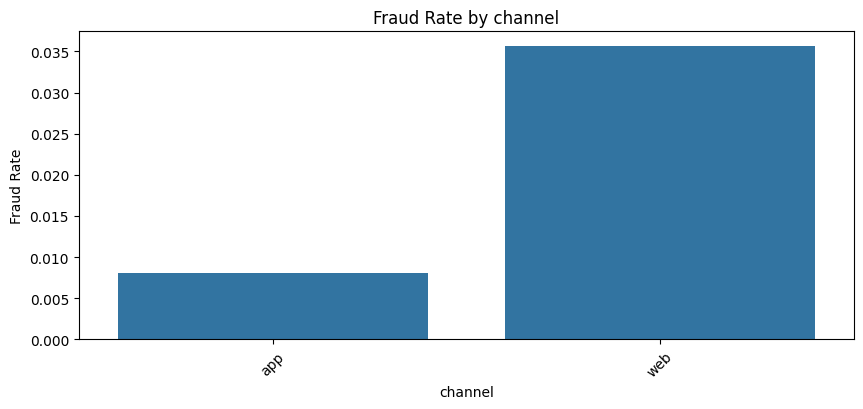

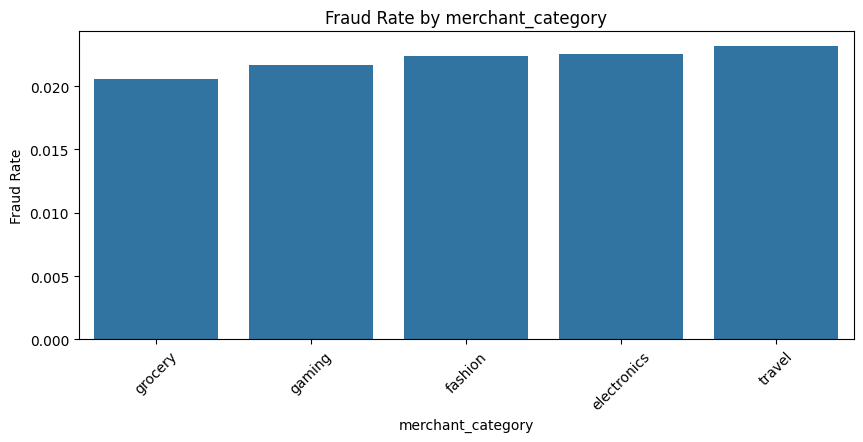

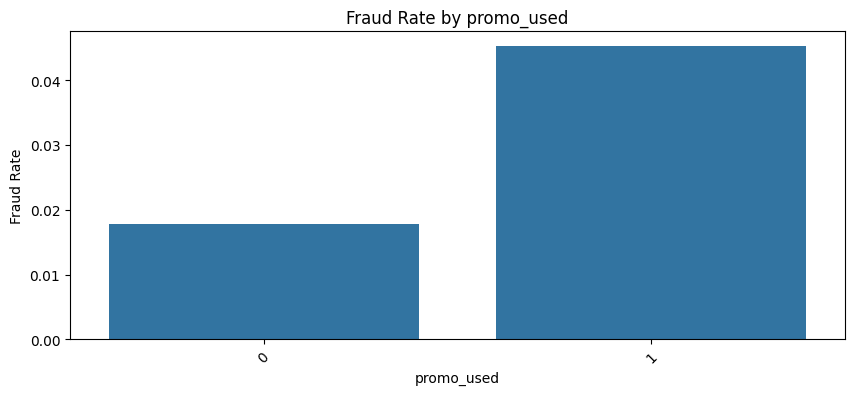

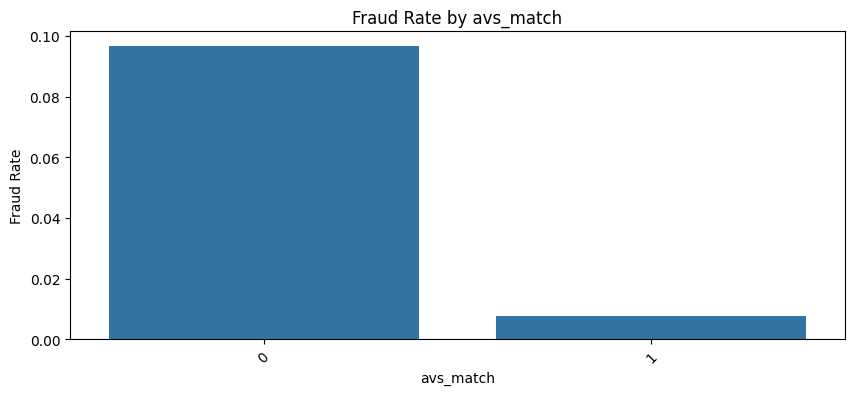

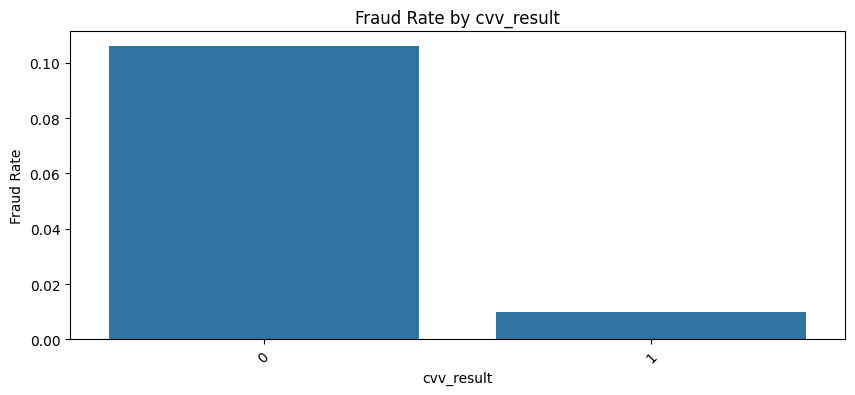

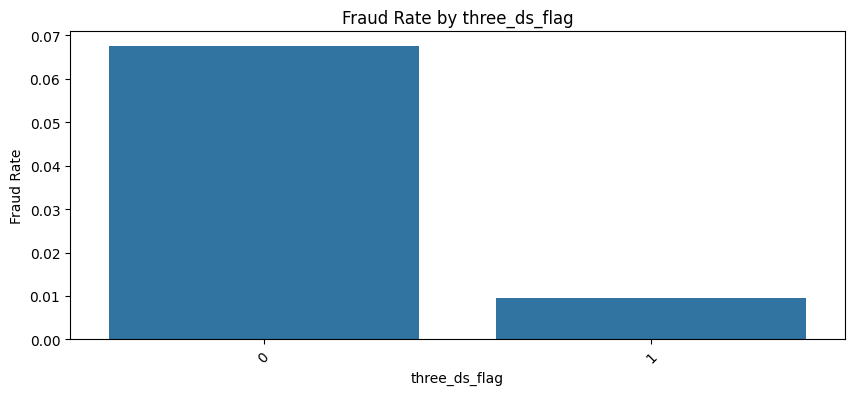

In [63]:
categorical_cols = ['country', 'bin_country', 'channel', 'merchant_category', 'promo_used', 'avs_match', 'cvv_result', 'three_ds_flag']

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    rate = df.groupby(col)['is_fraud'].mean().sort_values()
    sns.barplot(x=rate.index, y=rate.values)
    plt.title(f"Fraud Rate by {col}")
    plt.ylabel("Fraud Rate")
    plt.xticks(rotation=45)
    plt.show()

###### Drop kolom yang kurang berguna berdasarkan grafik plot

In [64]:
df = df.drop(['avg_amount_user', 'merchant_category'], axis=1)
df.head()

,account_age_days,total_transactions_user,amount,country,bin_country,channel,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,141,47,84.75,FR,FR,web,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,141,47,107.90,FR,FR,web,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,141,47,92.36,FR,FR,app,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,141,47,112.47,FR,FR,web,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,141,47,132.91,FR,US,web,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


###### Encode features

In [65]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['country','bin_country','channel']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

df['transaction_time'] = pd.to_datetime(df['transaction_time'], utc=True)
df['hour'] = df['transaction_time'].dt.hour
df['day_of_week'] = df['transaction_time'].dt.dayofweek  
df['day_of_month'] = df['transaction_time'].dt.day
df['month'] = df['transaction_time'].dt.month
df = df.drop('transaction_time', axis=1)

df.head()

,account_age_days,total_transactions_user,amount,country,bin_country,channel,promo_used,avs_match,cvv_result,three_ds_flag,shipping_distance_km,is_fraud,hour,day_of_week,day_of_month,month
0,141,47,84.75,2,2,1,0,1,1,1,370.95,0,4,5,6,1
1,141,47,107.90,2,2,1,0,0,0,0,149.62,0,20,1,9,1
2,141,47,92.36,2,2,0,1,1,1,1,164.08,0,6,4,12,1
3,141,47,112.47,2,2,1,0,1,1,1,397.40,0,17,0,15,1
4,141,47,132.91,2,9,1,0,1,1,1,935.28,0,1,2,17,1


###### Training

In [77]:
x = df.drop('is_fraud', axis=1)
y = df['is_fraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

###### Melihat feature importance

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [68]:
importances = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
print(importances)

account_age_days           0.237492
amount                     0.237407
shipping_distance_km       0.219743
avs_match                  0.037962
day_of_month               0.035642
hour                       0.033858
total_transactions_user    0.030504
cvv_result                 0.026150
month                      0.025692
country                    0.023302
bin_country                0.023238
day_of_week                0.021663
three_ds_flag              0.018682
channel                    0.016642
promo_used                 0.012022
dtype: float64


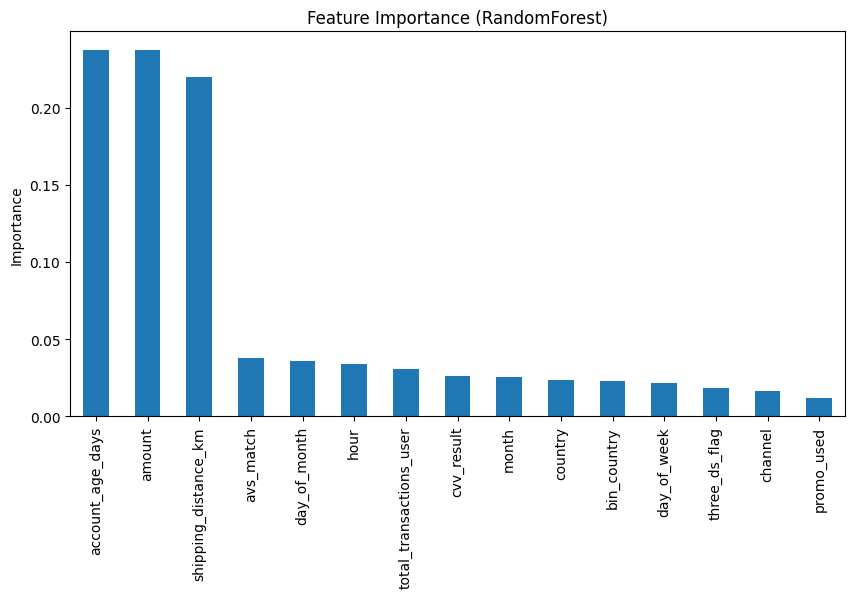

In [69]:
plt.figure(figsize=(10,5))
importances.plot(kind='bar')
plt.title("Feature Importance (RandomForest)")
plt.ylabel("Importance")
plt.show()

###### Fitur final

In [78]:
features = ['account_age_days', 'amount', 'shipping_distance_km', 'hour', 'day_of_week', 'day_of_month', 'month']
x = df[features]
y = df['is_fraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(x_train)

X_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     58640
           1       0.90      0.57      0.70      1299

    accuracy                           0.99     59939
   macro avg       0.95      0.79      0.85     59939
weighted avg       0.99      0.99      0.99     59939



In [79]:
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     58640
           1       0.88      0.57      0.69      1299

    accuracy                           0.99     59939
   macro avg       0.93      0.78      0.84     59939
weighted avg       0.99      0.99      0.99     59939



###### save model

In [80]:
import pickle

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
    
import json
with open('features.json', 'w') as f:
    json.dump(features, f)